In [2]:
%pip install unravelsports --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 815.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.1/128.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.9/30.9 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 115.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7

Restart Session Now

In [1]:
from unravel.soccer import KloppyPolarsDataset, PressingIntensity

In [2]:
!pip install ffmpeg mplsoccer

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 3.3 MB/s eta 0:00:00
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=31a9904bfdd3b145e1026ee9cd99a697dcbd936a303873e448a62408a45b9966
  Stored in directory: /root/.cache/pip/wheels/56/30/c5/576bdd729f3bc062d62a551be7fefd6ed2f761901568171e4e
Successfully built ffmpeg


In [3]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
from matplotlib.animation import FuncAnimation
from mplsoccer import VerticalPitch
import matplotlib.patheffects as path_effects
from google import genai
from kloppy import sportec

In [21]:
# Constants for visualization
HOME_COLOR, HOME_GK_COLOR = "red", "grey"
AWAY_COLOR, AWAY_GK_COLOR = "black", "green"
BALL_COLOR = "orange"
OUTPUT_VIDEO = "pressing_intensity_analysis.mp4"

In [6]:
from kloppy import sportec

coordinates = "secondspectrum"

kloppy_dataset = sportec.load_open_tracking_data(
    match_id="J03WMX", coordinates=coordinates, limit=5000
)

In [7]:
from unravel.soccer import KloppyPolarsDataset

dataset = KloppyPolarsDataset(kloppy_dataset=kloppy_dataset, orient_ball_owning=False)

In [8]:
from unravel.soccer import PressingIntensity

import polars as pl

model = PressingIntensity(dataset=dataset)
model.fit(
    start_time=pl.duration(minutes=1, seconds=53),
    end_time=pl.duration(minutes=2, seconds=32),
    period_id=1,
    method="teams",
    ball_method="max",
    orient="home_away",
    speed_threshold=2.0,
)
model.output.head()

game_id,period_id,frame_id,timestamp,time_to_intercept,probability_to_intercept,columns,rows
str,i64,i64,duration[μs],list[list[f64]],list[list[f64]],list[str],list[str]
"""DFL-MAT-J03WMX""",1,12872,1m 54s 880ms,"[[2.390701, 2.861643, … 3.90449], [2.898738, 4.564472, … 2.922833], … [2.813985, 4.03852, … 3.4157]]","[[0.0, 0.0, … 0.0], [0.0, 0.0, … 0.0], … [0.0, 0.0, … 0.0]]","[""DFL-OBJ-0000IA"", ""DFL-OBJ-0002AU"", … ""DFL-OBJ-J01B8N""]","[""DFL-OBJ-00012X"", ""DFL-OBJ-000270"", … ""DFL-OBJ-J01D1W""]"
"""DFL-MAT-J03WMX""",1,12873,1m 54s 920ms,"[[2.232504, 2.696582, … 3.951205], [2.941554, 4.503709, … 2.966431], … [2.736845, 3.856013, … 3.459606]]","[[0.0, 0.0, … 0.0], [0.0, 0.0, … 0.0], … [0.0, 0.0, … 0.0]]","[""DFL-OBJ-0000IA"", ""DFL-OBJ-0002AU"", … ""DFL-OBJ-J01B8N""]","[""DFL-OBJ-00012X"", ""DFL-OBJ-000270"", … ""DFL-OBJ-J01D1W""]"
"""DFL-MAT-J03WMX""",1,12874,1m 54s 960ms,"[[2.13599, 2.557744, … 3.988354], [2.996597, 4.454919, … 2.972684], … [2.766442, 3.697494, … 3.498005]]","[[0.0, 0.0, … 0.0], [0.0, 0.0, … 0.0], … [0.0, 0.0, … 0.0]]","[""DFL-OBJ-0000IA"", ""DFL-OBJ-0002AU"", … ""DFL-OBJ-J01B8N""]","[""DFL-OBJ-00012X"", ""DFL-OBJ-000270"", … ""DFL-OBJ-J01D1W""]"
"""DFL-MAT-J03WMX""",1,12875,1m 55s,"[[2.065953, 2.413484, … 4.042976], [3.042859, 4.403997, … 3.015308], … [2.727374, 3.538569, … 3.547081]]","[[0.0, 0.0, … 0.0], [0.0, 0.0, … 0.0], … [0.0, 0.0, … 0.0]]","[""DFL-OBJ-0000IA"", ""DFL-OBJ-0002AU"", … ""DFL-OBJ-J01B8N""]","[""DFL-OBJ-00012X"", ""DFL-OBJ-000270"", … ""DFL-OBJ-J01D1W""]"
"""DFL-MAT-J03WMX""",1,12876,1m 55s 40ms,"[[2.176109, 2.363153, … 4.005502], [3.042964, 4.352531, … 2.952664], … [2.943937, 3.499443, … 3.520907]]","[[0.0, 0.0, … 0.0], [0.0, 0.0, … 0.0], … [0.0, 0.0, … 0.0]]","[""DFL-OBJ-0000IA"", ""DFL-OBJ-0002AU"", … ""DFL-OBJ-J01B8N""]","[""DFL-OBJ-00012X"", ""DFL-OBJ-000270"", … ""DFL-OBJ-J01D1W""]"


In [9]:
import seaborn as sns

import matplotlib.pyplot as plt

from mplsoccer import VerticalPitch
from matplotlib.animation import FuncAnimation

import seaborn as sns
import numpy as np
import pandas as pd

HOME_COLOR, HOME_GK_COLOR = "red", "grey"
AWAY_COLOR, AWAY_GK_COLOR = "black", "green"
BALL_COLOR = "orange"


def __plot_settings(ax, row_players, column_players, speed_threshold: float = None):
    for t in ax.texts:
        t.set_text(t.get_text() + " %")
    ax.figure.axes[-1].yaxis.label.set_size(10)

    ax.tick_params(
        axis="both",
        which="major",
        labelsize=10,
        labelbottom=False,
        bottom=False,
        top=False,
        labeltop=True,
    )

    ax.tick_params(length=0)
    ax.xaxis.set_label_position("top")

    row_colors = [
        (
            (
                HOME_COLOR
                if player.is_home and not player.is_gk
                else (
                    HOME_GK_COLOR
                    if player.is_home
                    else AWAY_COLOR if not player.is_gk else AWAY_GK_COLOR
                )
            )
            if player is not None
            else BALL_COLOR
        )
        for player in row_players
    ]
    column_colors = [
        (
            (
                HOME_COLOR
                if player.is_home and not player.is_gk
                else (
                    HOME_GK_COLOR
                    if player.is_home
                    else AWAY_COLOR if not player.is_gk else AWAY_GK_COLOR
                )
            )
            if player is not None
            else BALL_COLOR
        )
        for player in column_players
    ]

    [t.set_color(color) for t, color in zip(ax.xaxis.get_ticklabels(), column_colors)]
    [t.set_color(color) for t, color in zip(ax.yaxis.get_ticklabels(), row_colors)]

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=45)

    fontsize = 15
    if model._method == "teams":
        ax.set_ylabel(row_players[0].team_name, fontsize=fontsize)
        ax.set_xlabel(column_players[0].team_name, fontsize=fontsize)
    else:
        ax.set_ylabel("", fontsize=fontsize)
        ax.set_xlabel("", fontsize=fontsize)

    for t in ax.texts:
        t.set_text(t.get_text())
    if speed_threshold is not None:
        ax.set_title(f"Active Pressing [v > {speed_threshold}m/s]", fontsize=14)


def __plot_dots(frame_data, ax):
    import matplotlib.patheffects as path_effects

    # Because we use VerticalPitch we flip x and y

    for r in frame_data.iter_rows(named=True):
        v, vy, vx, y, x = r["v"], r["vx"], r["vy"], r["x"], r["y"]
        is_ball = True if r["team_id"] == "ball" else False

        if not is_ball:
            player = dataset.get_player_by_id(player_id=r["id"])

            color = (
                HOME_COLOR
                if player.is_home and not player.is_gk
                else (
                    HOME_GK_COLOR
                    if player.is_home
                    else AWAY_COLOR if not player.is_gk else AWAY_GK_COLOR
                )
            )
            ax.scatter(x, y, color=color, s=150)

            if v > 1.0:
                ax.annotate(
                    "",
                    xy=(x + vx, y + vy),
                    xytext=(x, y),
                    arrowprops=dict(arrowstyle="->", color=color, lw=3),
                )
            # # Text with white border
            text = ax.text(
                x,
                y,
                player.number,
                color=color,
                fontsize=8,
                ha="center",
                va="center",
                zorder=5,
            )
            text.set_path_effects(
                [
                    path_effects.Stroke(
                        linewidth=2, foreground="white"
                    ),  # White border
                    path_effects.Normal(),  # Restore normal text appearance
                ]
            )
        else:
            ax.scatter(x, y, color=BALL_COLOR, s=50, zorder=10)


def __plot_matrix(
    matrix, row_players, column_players, ax, speed_threshold: float = None
):

    df = pd.DataFrame(
        data=matrix,
        index=[p.number if p is not None else "ball" for p in row_players],
        columns=[p.number if p is not None else "ball" for p in column_players],
    )
    sns.heatmap(
        df * 100,
        xticklabels=True,
        yticklabels=True,
        cmap="hot_r",
        ax=ax,
        vmin=0,
        vmax=100,
        annot=True,
        fmt=".0f",
        square=True,
        linewidths=0.5,
        cbar=False,
    )
    __plot_settings(ax, row_players, column_players, speed_threshold)
    return ax

In [10]:
def plot_pressing_intensity(row, ax1, ax2):
    period_id = row["period_id"]
    frame_id = row["frame_id"]

    row_players = [dataset.get_player_by_id(player_id) for player_id in row["rows"]]
    column_players = [
        dataset.get_player_by_id(player_id) for player_id in row["columns"]
    ]

    frame_data = model.dataset.filter(
        (pl.col("frame_id") == frame_id) & (pl.col("period_id") == period_id)
    )
    __plot_dots(frame_data=frame_data, ax=ax1)
    __plot_matrix(
        matrix=np.array([x for x in row["probability_to_intercept"]]),
        row_players=row_players,
        column_players=column_players,
        speed_threshold=model._speed_threshold,
        ax=ax2,
    )

video

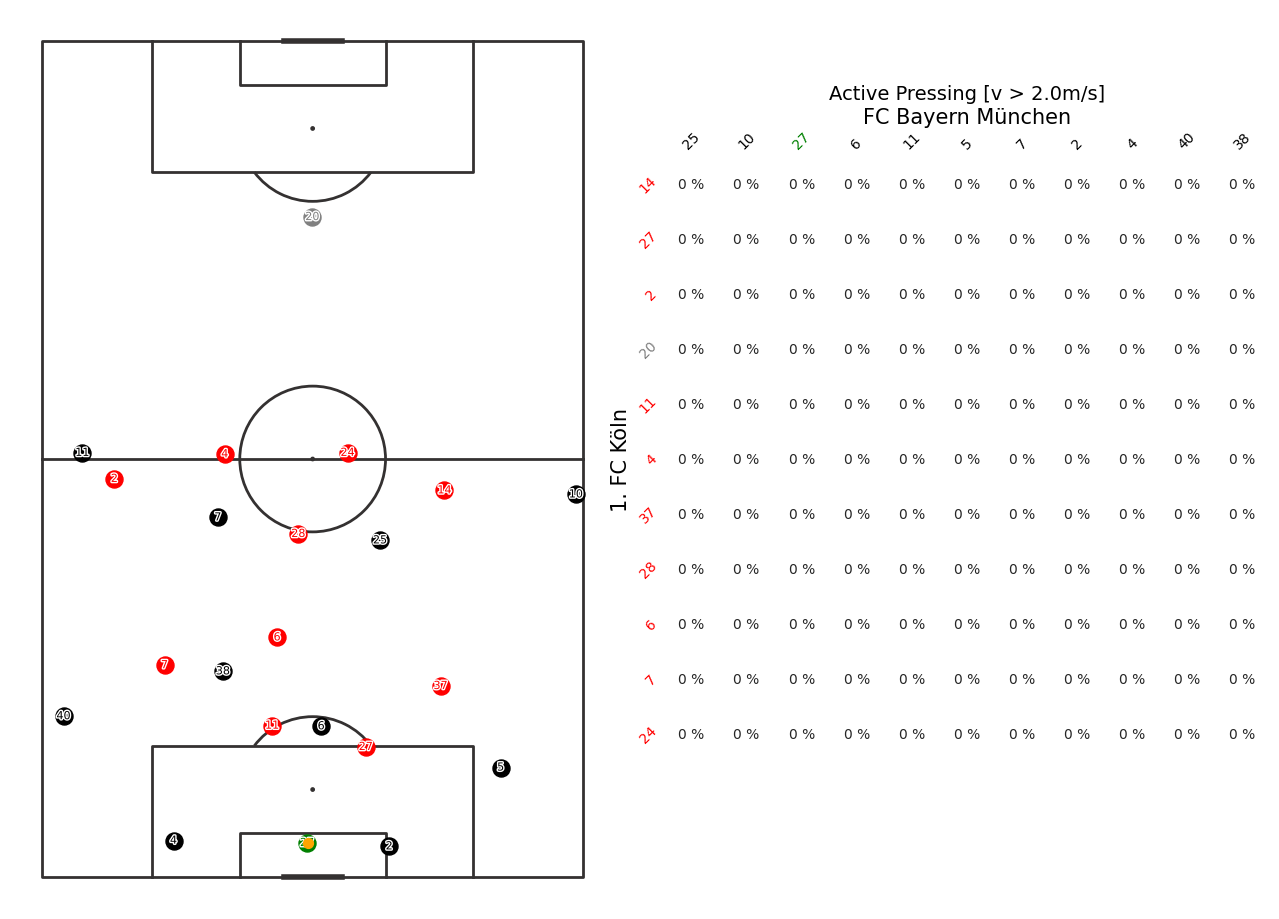

In [11]:
FILE_PATH = "FC Koln v Bayern.mp4"

pitch = VerticalPitch(
    pitch_type=coordinates,
    pitch_length=dataset.settings.pitch_dimensions.pitch_length,
    pitch_width=dataset.settings.pitch_dimensions.pitch_width,
    pitch_color="white",
    line_color="#343131",
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 10), gridspec_kw={"wspace": 0.08})
fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)


def update(idx):
    ax1.clear()
    ax2.clear()

    pitch.draw(ax=ax1)
    row = model.output.to_pandas().iloc[idx]
    plot_pressing_intensity(row, ax1, ax2)


ani = FuncAnimation(fig, update, frames=len(model.output), repeat=False)
ani.save(
    FILE_PATH, fps=kloppy_dataset.metadata.frame_rate, extra_args=["-vcodec", "libx264"]
)

In [17]:
# Upload the video file
client = genai.Client(api_key="ADD+YOURS")
video_path = "/content/FC Koln v Bayern.mp4"
video_file = client.files.upload(file=video_path)
print(f"Completed upload: {video_file.uri}")

Completed upload: https://generativelanguage.googleapis.com/v1beta/files/74fi9vwwd6i4


In [18]:
# Check if video processing is complete
while video_file.state.name == "PROCESSING":
        print('.', end='')
        time.sleep(1)
        video_file = client.files.get(name=video_file.name)

if video_file.state.name == "FAILED":
        raise ValueError(f"Video processing failed: {video_file.state.name}")

print('Video processing complete. Generating analysis...')

.Video processing complete. Generating analysis...


In [20]:
# Generate tactical analysis
prompt = """
        Analyze this football pressing intensity visualization showing a match between FC Köln and FC Bayern München:

        DETAILED ANALYSIS:
        1. Provide a timeline analysis identifying key pressing sequences and transitions (with timestamps if visible)
        2. Compare the pressing approaches of both teams (height of press, triggers, intensity patterns)
        3. Identify which zones of the pitch show highest pressing intensity and explain tactical implications
        4. Analyze numerical superiority/inferiority patterns during pressing phases

        PLAYER PERFORMANCE:
        1. Identify 2-3 standout pressing performers from each team with specific examples of their effectiveness
        2. Highlight which players are targeted most during opponent pressing and how they respond
        3. Evaluate coordination between pressing units (forwards, midfielders, defenders)

        TACTICAL RECOMMENDATIONS:
        1. For FC Köln: List 3 specific tactical adjustments to improve pressing effectiveness
        2. For FC Bayern München: List 3 specific counterpressing adaptations
        3. For both teams: Identify pressing triggers that could be optimized

        COACHING INSIGHTS:
        1. Provide 3 concise talking points a coach could use at half-time
        2. Suggest 2-3 in-game adjustments for immediate implementation
        3. Recommend 3 specific training drills to improve observed pressing weaknesses, including:
          - Drill name
          - Setup explanation (players, space, equipment)
          - Execution instructions
          - Progressive variations to increase difficulty

        Format your analysis as a professional tactical report with clear section headings and bullet points for key insights.
    """

response = client.models.generate_content(
        model="gemini-1.5-pro",
        contents=[video_file, prompt]
    )

print(response.text)

Here's a tactical report analyzing the pressing intensity visualization of the FC Köln vs. FC Bayern München match.

**MATCH: FC Köln vs. FC Bayern München**
**TOPIC: Pressing Intensity Analysis**

**I. DETAILED ANALYSIS**

**A. Timeline Analysis of Pressing Sequences and Transitions**

* **0:00-0:05:** Köln starts with a mid-block press, focusing on central areas. Bayern maintains possession, probing for openings.
* **0:05-0:10:** Bayern increases pressing intensity, forcing Köln into wide areas and triggering higher pressing percentages for Bayern in the opponent's half. 
* **0:10-0:15:**  Köln attempts to build from the back but faces intense Bayern pressure, leading to turnovers in dangerous areas and increased pressing percentages in Köln's defensive third for Bayern.
* **0:15-0:20:** Bayern continues its high press, disrupting Köln's build-up, while Köln seeks to bypass the pressure with long balls, as seen in the increasing pressing percentages in the midfield for Bayern.
* **0: